## STEPS:
1. Handling Missing Value 
    * Categorical - mode
    * Discrete numerical - mode
    * Continuous numerical - median (becs of outliers)
2. outliers Treatment -- Actually we did transformation not outlier treatment
    * log transform - perfomed only on LoanAmount feature 
3. Encoding -- categorical features -- one hot encoding

In [116]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [117]:
train=pd.read_csv("train.csv") 
test=pd.read_csv("test.csv")

## Missing Value and Outlier Treatment
After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can adversely affect the model performance.

Missing Value Imputation

In [118]:
# feature wise count of missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### observation:
There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:
* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

In [119]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [120]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

### observation:
It can be seen that in the loan amount term variable, the value of 360 is repeated the most. So we will replace the missing values in this variable using the mode of this variable.

In [121]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use the mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that “loan amount” have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [122]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [123]:
# Now let’s check whether all the missing values are filled in the dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [124]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

## OUTLIER TREATMENT


As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let’s examine what can happen to a data set with outliers. For the sample data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4

We find the following: mean, median, mode, and standard deviation
Mean = 2.58
Median = 2.5
Mode = 2
Standard Deviation = 1.08

If we add an outlier to the data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400

The new values of our statistics are:
Mean = 35.38
Median = 2.5
Mode = 2
Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.



Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much but reduces the larger values. So, we get a distribution similar to the normal distribution.

Let’s visualize the effect of log transformation. We will do similar changes to the test data simultaneously.

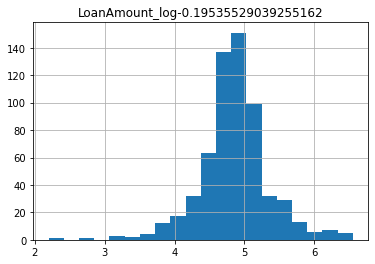

In [125]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
plt.title('LoanAmount_log'+str(train['LoanAmount_log'].skew()))
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

## 3. Encoding

Categorical  = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

Discrete Numerical = ['Loan_Amount_Term', 'Credit_History']

In [126]:
#train['Dependents'].replace('3+', 3,inplace=True) 
#test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

In [127]:
train=pd.concat([pd.get_dummies(train.drop("Loan_ID",1)),train["Loan_ID"]],1)
test=pd.concat([pd.get_dummies(test.drop("Loan_ID",1)),test["Loan_ID"]],1)

In [128]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,0,1,0,1,0,0,0,1,LP001002
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,0,0,1,0,1,0,1,0,0,LP001003
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,0,0,1,0,0,1,0,0,1,LP001005
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,0,0,0,1,1,0,0,0,1,LP001006
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,0,1,0,1,0,0,0,1,LP001008


### evaluation metrics:  --ROC-AUC ---TPR VS FPR

* The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.
* So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.
* We want to increase the area of the curve which will be maximum for classes 2,3,4 and 5 in the above example.
* For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false-positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.


## On the competition’s page, it has been mentioned that our submission data would be evaluated based on accuracy. Hence, we will use accuracy as our evaluation metric.

In [129]:
train.to_csv("train_FE1.csv",index = False)

In [130]:
test.to_csv("test_FE1.csv",index = False)